In [ ]:
!pip install ultralytics

In [2]:
from ultralytics import YOLO
import os
import glob
import cv2
import matplotlib.pyplot as plt  # Optionally import for displaying images
from PIL import Image
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
# from tensorflow.keras.applications import VGG16
# from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input

# importing images

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import cv2
import os

import glob
from google.colab import drive
import matplotlib.pyplot as plt  # Optionally import for displaying images

# Specify the folder path within your Drive
folder_path = '/content/drive/MyDrive/FINAL_YEAR_PROJECT/crop_images'  # Replace with your actual path

# List image files (adjust extensions as needed)
image_folder_paths = glob.glob(os.path.join(folder_path, "*"))
all_images = []
image_names=[]
for i in image_folder_paths:

  image_paths = glob.glob(os.path.join(i, "*"))

  for image_path in image_paths:
      #print(image_path)
      if not os.path.isfile(image_path):
          continue  # Skip non-image files
      image_name = os.path.basename(image_path)
      image_names.append(image_name)

      img = cv2.imread(image_path)
      image=cv2.resize(img,(224,224))

      all_images.append(image)




In [5]:
image_names=np.array(image_names)

In [6]:
file_path = '/content/drive/MyDrive/FINAL_YEAR_PROJECT/website data/names/image_names'

# Save the similarity matrix to the specified directory
np.save(file_path, image_names)

In [7]:
# Specify the folder path within your Drive
folder_path = '/content/drive/MyDrive/FINAL_YEAR_PROJECT/crop_images'  # Replace with your actual path
print("Folder path:", folder_path)

# List image files (adjust extensions as needed)
image_folder_paths = glob.glob(os.path.join(folder_path, "*"))
print("Image folder paths:", image_folder_paths)

all_images = []
image_names = []

for i in image_folder_paths:
    image_paths = glob.glob(os.path.join(i, "*"))

    for image_path in image_paths:
        if not os.path.isfile(image_path):
            continue  # Skip non-image files
        image_name = os.path.basename(image_path)
        image_names.append(image_name)

        img = cv2.imread(image_path)
        image = cv2.resize(img, (224, 224))

        all_images.append(image)

print("Number of images read:", len(all_images))

Folder path: /content/drive/MyDrive/FINAL_YEAR_PROJECT/crop_images
Image folder paths: ['/content/drive/MyDrive/FINAL_YEAR_PROJECT/crop_images/shirts', '/content/drive/MyDrive/FINAL_YEAR_PROJECT/crop_images/hoodie', '/content/drive/MyDrive/FINAL_YEAR_PROJECT/crop_images/knit', '/content/drive/MyDrive/FINAL_YEAR_PROJECT/crop_images/Tshirt']
Number of images read: 38


In [8]:
all_images=np.array(all_images)
all_images.shape

(38, 224, 224, 3)

# **recommendation**

In [9]:

def detection(image_path):

    org_img = cv2.imread(image_path)
    org_img = cv2.resize(org_img, (224, 224))
    plt.imshow(org_img)
    plt.show()

    model_path = '/content/drive/MyDrive/FINAL_YEAR_PROJECT/model/best.pt'
    model = YOLO(model_path)
    results = model.predict(image_path, conf=0.25, save_txt=True, save_crop=True, save=True)
    print(' detection process is completed')


    temp_folder_path = '/content/runs/detect/'

    filename=os.listdir(temp_folder_path)
    sorted_folders = sorted(filename, key=lambda x: os.path.getmtime(os.path.join(temp_folder_path, x)), reverse=True)[0]

    src = os.path.join(temp_folder_path, sorted_folders)
    try:
      predict=os.path.join(src,'crops')

      print(predict)
      folder=os.path.join(predict, os.listdir(predict)[0])
      get_image=os.path.join(folder,os.listdir(folder)[0])

      img = cv2.imread(get_image)
      image=cv2.resize(img,(224,224))
      plt.imshow(image)
      plt.show()
      return(image)

    except:
        return None



In [10]:
#load numpy models:
def load_features():
  file_path = '/content/drive/MyDrive/FINAL_YEAR_PROJECT/features_and_similarity'


  similarity_matrix = np.load(file_path+'/similarity_matrix.npy')
  features=np.load(file_path+'/features.npy')
  print("similarity_matrix",similarity_matrix.shape)
  print('features',features.shape)
  return(similarity_matrix,features)

In [11]:

def recommend(image_path,all_images):
  new_image=detection(image_path)

  if new_image is not None:
    similarity_matrix,features=load_features()

    processed_new_image = preprocess_input(np.expand_dims(new_image, axis=0))
    resnet_model = ResNet50(weights='imagenet', include_top=False, pooling='max')
    features_new_image = resnet_model.predict(processed_new_image)


    similarities = cosine_similarity(features_new_image, features)

    # Find top 5 similar images
    top_5_indices = np.argsort(similarities[0])[::-1][:5]
    print(top_5_indices)
    # Plot the similar images
    plt.figure(figsize=(15, 5))
    for i, index in enumerate(top_5_indices):
        plt.subplot(1, 5, i + 1)
        plt.imshow(all_images[index])
        plt.title(f'Similar Image {i+1}')
        plt.axis('off')
    plt.show()
  else:
    print("\n")

    print("THE SYSTEM CAN'T DETECT ANY APPAREL ITEMS, YOU MIGHT CONSIDER TRYING A DIFFERENT TYPE OF IMAGE FOR SEARCH")


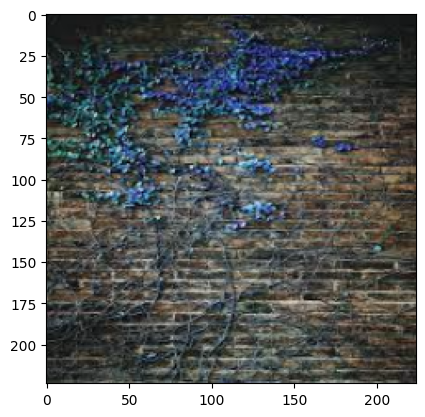


image 1/1 /content/drive/MyDrive/FINAL_YEAR_PROJECT/images_for_testing/background.jpg: 640x544 (no detections), 119.4ms
Speed: 2.5ms preprocess, 119.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 544)
Results saved to runs/detect/predict5
0 label saved to runs/detect/predict5/labels
 detection process is completed
/content/runs/detect/predict5/crops


THE SYSTEM CAN'T DETECT ANY APPAREL ITEMS, YOU MIGHT CONSIDER TRYING A DIFFERENT TYPE OF IMAGE FOR SEARCH


In [18]:
recommend('/content/drive/MyDrive/FINAL_YEAR_PROJECT/images_for_testing/background.jpg',all_images)


In [13]:
np.array(image_names)[[34,16,20,12,37]]

array(['img_ex_3.jpg', 'img_4_out.jpg', 'img_21_out.jpg', 'img_8_out.jpg', 'polka_2.jpg'], dtype='<U15')